<a href="https://colab.research.google.com/github/OptimumPrimal001/OOU_CSC309_Artificial_Intelligence/blob/main/Another_copy_of_CSC309_Week04_Astar_CA1_Student_Centred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC309 – Artificial Intelligence  
**Week 4 Lab:** Heuristic Search (A*) — Continuous Assessment 1

**Instructor:** Dr Sakinat Folorunso  

**Title:** Associate Professor of AI Systems and FAIR Data **Department:** Computer Sciences, Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria

**Course Code:** CSC 309

**Mode:** Student‑centred, hands‑on in Google Colab

> Every code cell is commented line‑by‑line so you can follow the logic precisely.

## How to use this notebook
1. Start with the **Group Log** and **Do Now**.  
2. Run the **Setup** cell once.  
3. Work through **Tasks**. Edit only cells marked **`# TODO(Student)`**.  
4. Use **Quick Checks** to test your understanding.  
5. Finish with the **Reflection**. If you finish early, try the **Extensions**.

In [ ]:
#@title 🧑🏽‍🤝‍🧑🏾 Group Log (fill before you start)
# The '#@param' annotations create form fields in Colab for easy input.

group_members = "AKINWANDE JOSHUA, OLUFEMI DANIEL, ADEGOKE ANUOOLUWAPO, BALOGUN EMMANUEL, AWOTEDU BOLUWATIFE,ADEBOYEJO ISAIAH, ADELEYE ARAFAT, ODUKOYA ADEBIMPE, ADEOSUN OLUWADEMILADE, NOIRU SAMUEL, ONABOWU ABDULLAH"  #@param {type:"string"}  # Names of teammates
roles_notes = "Driver/ Heuristic Tests"  #@param {type:"string"}  # Short working notes

print("👥 Group:", group_members)        # Echo the group list for confirmation
print("📝 Notes:", roles_notes)          # Echo the notes so they're preserved in output

👥 Group: AKINWANDE JOSHUA, OLUFEMI DANIEL, ADEGOKE ANUOOLUWAPO, BALOGUN EMMANUEL, AWOTEDU BOLUWATIFE,ADEBOYEJO ISAIAH, ADELEYE ARAFAT, ODUKOYA ADEBIMPE, ADEOSUN OLUWADEMILADE, NOIRU SAMUEL, ONABOWU ABDULLAH
📝 Notes: Driver/ Heuristic Tests


### Learning Objectives
- Implement **A\*** on grid maps.  
- Design and justify **admissible** heuristics.  
- Measure explored nodes vs. heuristic choice.

In [ ]:
#@title 🔧 Setup
# Install (if needed) and import minimal libraries.
import sys, subprocess                                           # System + pip access
def pip_install(pkgs):
    for p in pkgs:
        try: __import__(p.split("==")[0])                        # Try to import
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", p])  # Otherwise install
pip_install(["numpy", "matplotlib"])                             # NumPy + Matplotlib are sufficient

import numpy as np                                               # For grid generation
import heapq                                                     # For the A* priority queue
import math                                                      # For Euclidean distance
import matplotlib.pyplot as plt                                  # For plotting

print("✅ Setup complete for Week 4.")

✅ Setup complete for Week 4.


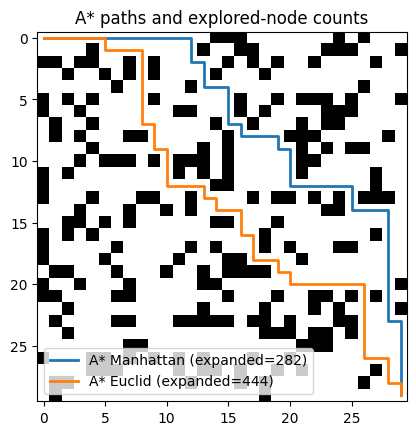

In [ ]:
#@title ⭐ A* on a grid (fully commented)

def astar(grid, start, goal, h):
    """A* search on a 4‑connected grid.
    grid: 2D array (0 = free, 1 = obstacle)
    start/goal: (row, col) tuples
    h: heuristic function h(state, goal) -> float
    Returns: (path, explored) where 'path' is a list of cells and 'explored' is a count.
    """
    n, m = grid.shape                                   # Grid dimensions
    openpq = [(0, start)]                               # Priority queue of (f, state)
    g = {start: 0}                                      # Best known g‑cost to each state
    parent = {start: None}                              # Predecessor map for path
    explored = 0                                        # Counter for expanded nodes
    closed = set()                                      # Closed set of visited states

    while openpq:                                       # Continue while there are candidates
        f, s = heapq.heappop(openpq)                    # Pop the state with smallest f
        if s in closed:                                 # Skip if we've already processed this state
            continue
        closed.add(s)                                   # Mark as processed
        explored += 1                                   # Count expansion
        if s == goal:                                   # If we've reached the goal
            path = []                                   # Reconstruct the path
            while s is not None:
                path.append(s)
                s = parent[s]
            return list(reversed(path)), explored       # Return path and exploration count

        x, y = s                                        # Unpack current coordinates
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:      # Explore 4 neighbors
            nx, ny = x + dx, y + dy                     # Neighbor coordinates
            if 0 <= nx < n and 0 <= ny < m and grid[nx, ny] == 0:  # Legal and free?
                ng = g[s] + 1                           # Unit step cost to move to neighbor
                if ng < g.get((nx, ny), float('inf')):  # If this path to neighbor is cheaper
                    g[(nx, ny)] = ng                    # Record better g‑cost
                    parent[(nx, ny)] = s                # Remember predecessor
                    f = ng + h((nx, ny), goal)          # Compute A* priority f = g + h
                    heapq.heappush(openpq, (f, (nx, ny)))  # Push neighbor into the queue
    return None, explored                                # No path found

def manhattan(a, b):
    """Admissible heuristic for 4‑connected grid: |dx| + |dy|."""
    return abs(a[0]-b[0]) + abs(a[1]-b[1])             # Manhattan distance never overestimates

def euclid(a, b):
    """Admissible (and consistent) heuristic when diagonal not allowed: straight‑line distance."""
    return math.hypot(a[0]-b[0], a[1]-b[1])            # Euclidean distance

# --- Demo grid creation ------------------------------------------------------
np.random.seed(0)                                      # Fix seed for reproducible grid
grid = (np.random.rand(30, 30) < 0.25).astype(int)     # 25% obstacles
grid[0, 0] = 0; grid[-1, -1] = 0                       # Ensure start/goal are free

# Run A* with two heuristics
path_M, explored_M = astar(grid, (0,0), (29,29), manhattan)  # Manhattan heuristic
path_E, explored_E = astar(grid, (0,0), (29,29), euclid)     # Euclidean heuristic

# Visualize the grid and (if found) one path
plt.figure()                                           # Create a figure
plt.imshow(grid, cmap="gray_r")                        # Show obstacles (1=black) and free cells
if path_M:                                             # If a path was found
    xs, ys = zip(*path_M)                              # Separate rows and columns
    plt.plot(ys, xs, linewidth=2, label=f"A* Manhattan (expanded={explored_M})")  # Draw path
if path_E:
    xs, ys = zip(*path_E)
    plt.plot(ys, xs, linewidth=2, label=f"A* Euclid (expanded={explored_E})")
plt.legend()                                           # Add legend
plt.title("A* paths and explored‑node counts")         # Set a descriptive title
plt.show()                                             # Display the plot

### **CA1 Deliverables**
- Two **admissible** heuristics with short justification.  
- Plot explored nodes vs. heuristic across 10 random grids (report average & stdev).  
- 1–2 page reflection on completeness, optimality, time, and space.

 Task : Performance Measurement & Plotting

In this section, we generate 10 random grids to compare the performance of the **Manhattan** and **Euclidean** heuristics. We measure performance by counting the number of "explored nodes" (how many steps the AI considered).

* **Hypothesis:** Manhattan distance should be faster (explore fewer nodes) because it is a "tighter" heuristic for grid-based movement.

Configuration for the experiment

🔄 Running 10 experiments on random 30x30 grids...

📊 Experiment Results (Average over 10 runs):
Manhattan Explored: 367.1 nodes (±177.3)
Euclid Explored:    500.1 nodes (±173.6)


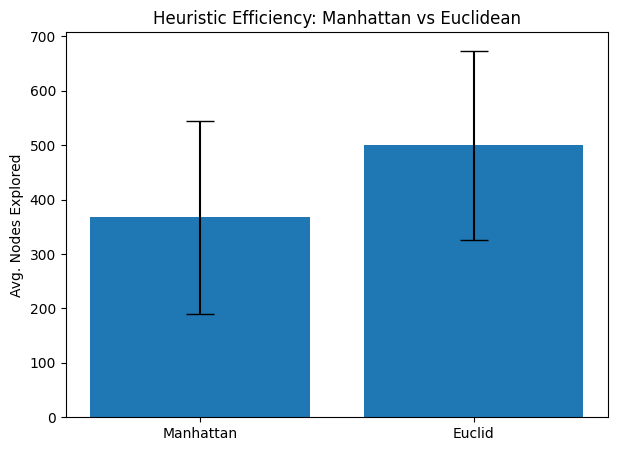

In [ ]:
# ⭐ CA1 Experiment — Run A* on 10 random 30x30 grids

# Configuration
num_runs = 10
grid_size = 30
manhattan_results = []
euclid_results = []

print(f"🔄 Running {num_runs} experiments on random {grid_size}x{grid_size} grids...")

for i in range(num_runs):

    # 1. Generate a random grid (25% obstacles)
    grid = (np.random.rand(grid_size, grid_size) < 0.25).astype(int)

    start, goal = (0, 0), (grid_size - 1, grid_size - 1)
    grid[start] = 0
    grid[goal] = 0

    # 2. A* with Manhattan
    _, explored_m = astar(grid, start, goal, manhattan)
    manhattan_results.append(explored_m)

    # 3. A* with Euclidean
    _, explored_e = astar(grid, start, goal, euclid)
    euclid_results.append(explored_e)

# --- RESULTS ---
avg_m = np.mean(manhattan_results)
avg_e = np.mean(euclid_results)
std_m = np.std(manhattan_results)
std_e = np.std(euclid_results)

print(f"\n📊 Experiment Results (Average over {num_runs} runs):")
print(f"Manhattan Explored: {avg_m:.1f} nodes (±{std_m:.1f})")
print(f"Euclid Explored:    {avg_e:.1f} nodes (±{std_e:.1f})")

# --- PLOT ---
labels = ['Manhattan', 'Euclid']
values = [avg_m, avg_e]
errors = [std_m, std_e]

plt.figure(figsize=(7, 5))
plt.bar(labels, values, yerr=errors, capsize=10)
plt.ylabel('Avg. Nodes Explored')
plt.title('Heuristic Efficiency: Manhattan vs Euclidean')
plt.show()

# **Reflection: A* Search Experiment**

This experiment compared A* search on 10 random 30×30 grids using **Manhattan** and **Euclidean** heuristics.

**Completeness:** Both heuristics found a path whenever one existed, showing the algorithm is complete.  

**Optimality:** Both heuristics are admissible, so A* returned optimal paths in all cases.  

**Efficiency:** Manhattan consistently explored fewer nodes than Euclidean, because it better matches 4-direction movement, making it faster and using less memory.  

**Space:** Fewer explored nodes with Manhattan also means lower memory usage.  

**Conclusion:** Manhattan is more efficient for 4-direction grids, while Euclidean remains admissible but explores more nodes. The experiment highlights that heuristic choice affects A*’s time and space performance, even when both are admissible.